# Univariate selection

In [2]:
import pandas as pd
import numpy as np

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])     # data 
columns = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [53]:
df = pd.DataFrame(data,columns = columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [56]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k = 10)
fit =  bestfeatures.fit(X, y)

In [57]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [58]:
#concate two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis =1,)
featureScores.columns = ['Specs','Score']
rslt_df = featureScores.sort_values(by = 'Score', ascending=False)
rslt_df

,Specs,Score
12,LSTAT,601.617871
5,RM,471.846740
10,PTRATIO,175.105543
2,INDUS,153.954883
9,TAX,141.761357
4,NOX,112.591480
0,CRIM,89.486115
8,RAD,85.914278
6,AGE,83.477459
1,ZN,75.257642


In [61]:
featureScores.nlargest(10,'Score')

,Specs,Score
12,LSTAT,601.617871
5,RM,471.846740
10,PTRATIO,175.105543
2,INDUS,153.954883
9,TAX,141.761357
4,NOX,112.591480
0,CRIM,89.486115
8,RAD,85.914278
6,AGE,83.477459
1,ZN,75.257642


# Feature Importance

you can get the feature importance of each feature of your dataset by using the feature importance property of the model

Feature importance gives you a score for each feature of your data the higher the score more important or relevant is the feature towards your output variable

In [62]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [63]:
model.feature_importances_

array([0.03260985, 0.00280496, 0.04791198, 0.0156682 , 0.03998551,
       0.32194245, 0.01874053, 0.03454826, 0.0174699 , 0.04384193,
       0.04717181, 0.01655785, 0.36074677])

<AxesSubplot: >

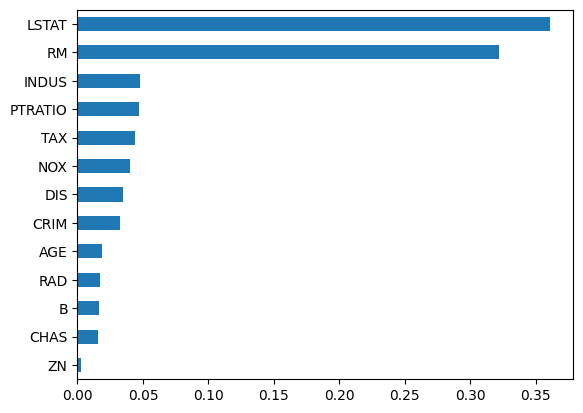

In [68]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values().plot(kind='barh')